In [1]:
import time
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import check_random_state
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
# np.save("mnist_784_X", X, allow_pickle=True)
# np.save("mnist_784_y", y, allow_pickle=True)

In [3]:
X = np.load("./dataset/mnist_784_X.npy", allow_pickle=True)
y = np.load("./dataset/mnist_784_y.npy", allow_pickle=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
forest.score(X_test, y_test)

0.9653142857142857

In [21]:
some_digit = X_train[2727]
some_digit_image = some_digit.reshape(28, 28)
some_digit_image.shape

(28, 28)

In [24]:
y_train[2727]

'2'

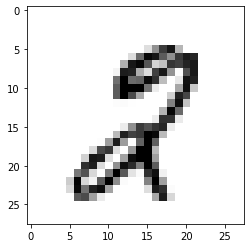

In [23]:
plt.imshow(some_digit_image, cmap="binary")

In [44]:
sample = X_train[2727].reshape(1, -1)
sample.shape

(1, 784)

In [45]:
sample

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [31]:
forest.predict(sample)

array(['2'], dtype=object)

## test model with an image from outside of the dataset

In [207]:
def preprocess_image(img):
    # Grab just the R channel (RGB all have the same values here)
    img = img[:, :, 0]

    # Invert values
    img = 1 - img
    
    # Scale values from 0.0 – 1.0 to 0.0 – 255.0
    img = img * 255.0
    
    return img

In [71]:
def display_image(img):
    plt.imshow(img, cmap="binary")

In [223]:
def make_prediction(model, sample):
    x = sample.reshape(1, -1)
    prediction = model.predict(x)
    print(f"Prediction: {prediction[0]}")
    return prediction[0]

In [157]:
def reshape_mnist_sample(sample):
    return sample.reshape(28, 28)

Prediction: 5


'5'

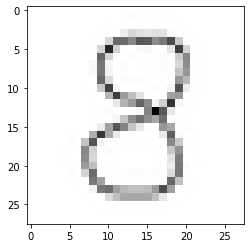

In [224]:
img = mpimg.imread("./images/eight_resized.png")

img = preprocess_image(img)
display_image(img)
make_prediction(forest, img)

Prediction: 0


'0'

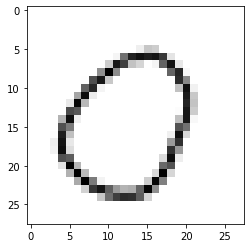

In [225]:
img = mpimg.imread("./images/experiment/0_28px.png")
img = preprocess_image(img)
display_image(img)
make_prediction(forest, img)

Prediction: 2


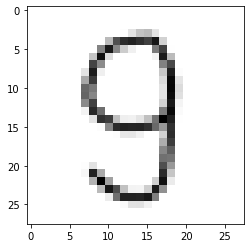

In [209]:
img = mpimg.imread("./images/experiment/9_28px.png")
img = preprocess_image(img)
display_image(img)
make_prediction(forest, img)

In [197]:
def get_random_digit(data=X_train):
    random_index = np.int(np.floor(np.random.random() * len(data)))
    random_index

    return data[random_index]

In [198]:
def make_prediction_for_random_digit(model, data=X_train):
    img = get_random_digit(data)
    img = reshape_mnist_sample(img)
    display_image(img)
    make_prediction(model, img)

Prediction: 2


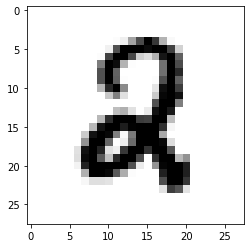

In [201]:
make_prediction_for_random_digit(forest)

In [212]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


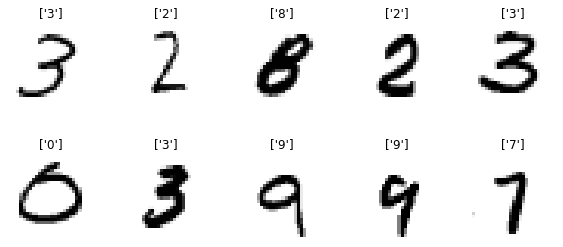

In [220]:
# Plot a bunch of images from the train data
def plot_train_data():
    n_rows = 2
    n_cols = 5
    plt.figure(figsize=(n_cols * 2, n_rows * 2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            img = X_train[index].reshape(28, 28)
            plt.imshow(img, cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title([y_train[index]], fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

plot_train_data()

0
Prediction: 0
1
Prediction: 7
2
Prediction: 2
3
Prediction: 3
4
Prediction: 4
5
Prediction: 5
6
Prediction: 5
7
Prediction: 2
8
Prediction: 5
9
Prediction: 2


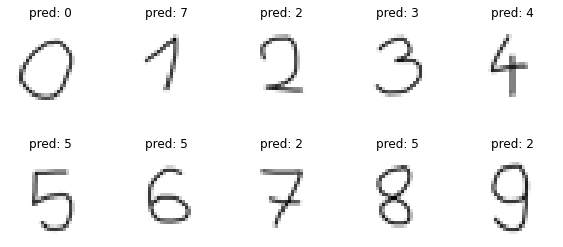

In [230]:
# Plot external images
def plot_external_data(model):
    n_rows = 2
    n_cols = 5
    plt.figure(figsize=(n_cols * 2, n_rows * 2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            print(index)
            plt.subplot(n_rows, n_cols, index + 1)
            filename = f"./images/experiment/{index}_28px.png"
            img = mpimg.imread(filename)
            plt.imshow(img, cmap="binary", interpolation="nearest")
            plt.axis('off')
            img = preprocess_image(img)
            prediction = make_prediction(model, img)
            plt.title(f"pred: {prediction}", fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()


plot_external_data(forest)